# Initialization

## Imports


In [1]:
# add src to path
from pyprojroot import here
import sys

sys.path.append(str(here("src")))

# import analysis_utils
from code.models import *
from code.analysis_utils import *

# load other libraries
from dotenv import load_dotenv
import logging
from pyprojroot import here
from pandas.errors import SettingWithCopyWarning

load_dotenv()

from code.make_figs import FigureGenerator
from code.analysis_pipeline import AnalysisPipeline

# suppress logging and warnings
import warnings

logging.getLogger("code.utils").setLevel(
    logging.WARNING
)  # suppress logging of dataset sizes from train_utils
logging.getLogger("code.models").setLevel(
    logging.WARNING
)  # suppress logging of model parameters from models.py
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=SettingWithCopyWarning)

# configure numpy and pytorch to print entire arrays/tensors
np.set_printoptions(threshold=np.inf)
torch.set_printoptions(threshold=torch.inf)

INFO:numexpr.utils:Note: detected 128 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 128 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 16.
INFO:numexpr.utils:NumExpr defaulting to 16 threads.


## Set up analysis pipeline


In [2]:
# choose variables to evaluate
CONTEXT_LENGTH_TO_EVAL = [128]
MLP_EXPANSION_FACTOR_TO_EVAL = [4]
NUM_DIMS_TO_EVAL = [8]
NUM_TASKS_TO_EVAL = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
SETTING = "categorical-sequence"
EXP_NAME = "lr-annealing"

fixed_values = {
    "context_length": CONTEXT_LENGTH_TO_EVAL[0],
    "mlp_expansion_factor": MLP_EXPANSION_FACTOR_TO_EVAL[0],
    "num_dims": NUM_DIMS_TO_EVAL[0],
}

analysis_pipeline_upto_256 = AnalysisPipeline(
    setting=SETTING,
    exp_name=EXP_NAME,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
)

EXP_NAME_256_LONGRUN = "lr-annealing-256-longrun"
analysis_pipeline_256_longrun = AnalysisPipeline(
    setting=SETTING,
    exp_name=EXP_NAME_256_LONGRUN,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
)

EXP_NAME_512_LONGRUN = "lr-annealing-512-longrun"
analysis_pipeline_512_longrun = AnalysisPipeline(
    setting=SETTING,
    exp_name=EXP_NAME_512_LONGRUN,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
)


# load standard experiment for comparison
EXP_STANDARD = "full-exp-params"
analysis_pipeline_standard = AnalysisPipeline(
    setting=SETTING,
    exp_name=EXP_STANDARD,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
)

experiment params:  {'setting': 'categorical-sequence', 'num_dims_lst': [8], 'num_tasks_lst': [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096], 'context_length_lst': [128], 'mlp_expansion_factor_lst': [4], 'random_seed': 1, 'num_hidden_layers': 1, 'hidden_size': 64, 'batch_size': 64, 'learning_rate': 0.0005, 'max_steps': 100000, 'save_steps': [20, 58, 115, 193, 291, 408, 545, 703, 879, 1076, 1293, 1529, 1785, 2062, 2357, 2673, 3009, 3364, 3739, 4135, 4549, 4984, 5439, 5913, 6407, 6921, 7455, 8009, 8583, 9176, 9789, 10422, 11075, 11748, 12441, 13153, 13885, 14637, 15409, 16201, 17013, 17844, 18695, 19566, 20457, 21368, 22298, 23249, 24219, 25209, 26219, 27249, 28298, 29368, 30457, 31566, 32695, 33844, 35012, 36201, 37409, 38637, 39885, 41153, 42440, 43747, 45075, 46422, 47789, 49175, 50582, 52008, 53455, 54921, 56407, 57912, 59438, 60983, 62548, 64133, 65738, 67363, 69008, 70672, 72356, 74060, 75784, 77528, 79291, 81075, 82878, 84701, 86544, 88407, 90289, 92192, 94114, 96056, 98018, 

  0%|          | 0/1100 [00:00<?, ?it/s]

experiment params:  {'setting': 'categorical-sequence', 'num_dims_lst': [8], 'num_tasks_lst': [256], 'context_length_lst': [128], 'mlp_expansion_factor_lst': [4], 'random_seed': 1, 'num_hidden_layers': 1, 'hidden_size': 64, 'batch_size': 64, 'learning_rate': 0.0005, 'max_steps': 2000000, 'save_steps': [20, 133, 347, 661, 1076, 1591, 2206, 2922, 3738, 4655, 5672, 6789, 8006, 9324, 10743, 12262, 13881, 15600, 17420, 19340, 21361, 23482, 25703, 28025, 30447, 32969, 35592, 38315, 41139, 44062, 47087, 50211, 53436, 56762, 60188, 63714, 67340, 71067, 74894, 78822, 82850, 86978, 91207, 95536, 99965, 104495, 109125, 113856, 118687, 123618, 128650, 133782, 139014, 144347, 149780, 155314, 160948, 166682, 172516, 178451, 184487, 190622, 196859, 203195, 209632, 216169, 222807, 229545, 236383, 243322, 250361, 257500, 264740, 272080, 279521, 287062, 294703, 302444, 310286, 318229, 326272, 334415, 342658, 351002, 359446, 367991, 376636, 385381, 394227, 403173, 412220, 421366, 430614, 439961, 449409, 

  0%|          | 0/200 [00:00<?, ?it/s]

experiment params:  {'setting': 'categorical-sequence', 'num_dims_lst': [8], 'num_tasks_lst': [512], 'context_length_lst': [128], 'mlp_expansion_factor_lst': [4], 'random_seed': 1, 'num_hidden_layers': 1, 'hidden_size': 64, 'batch_size': 64, 'learning_rate': 0.0005, 'max_steps': 10000000, 'save_steps': [20, 413, 1311, 2712, 4616, 7024, 9936, 13351, 17270, 21693, 26619, 32049, 37983, 44420, 51360, 58805, 66753, 75204, 84159, 93618, 103580, 114046, 125016, 136489, 148466, 160946, 173930, 187418, 201409, 215904, 230902, 246404, 262410, 278919, 295932, 313448, 331468, 349992, 369020, 388550, 408585, 429123, 450165, 471710, 493759, 516312, 539368, 562928, 586991, 611558, 636629, 662203, 688281, 714863, 741948, 769536, 797629, 826224, 855324, 884927, 915034, 945644, 976758, 1008376, 1040497, 1073122, 1106250, 1139882, 1174018, 1208657, 1243800, 1279446, 1315596, 1352250, 1389407, 1427068, 1465233, 1503901, 1543073, 1582748, 1622927, 1663609, 1704796, 1746485, 1788679, 1831376, 1874576, 19182

  0%|          | 0/200 [00:00<?, ?it/s]

experiment params:  {'setting': 'categorical-sequence', 'num_dims_lst': [8, 12, 16], 'num_tasks_lst': [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096], 'context_length_lst': [128, 256, 320], 'mlp_expansion_factor_lst': [0.5, 4, 8], 'random_seed': 1, 'num_hidden_layers': 1, 'hidden_size': 64, 'batch_size': 64, 'learning_rate': 0.0005, 'max_steps': 100000, 'save_steps': [20, 58, 115, 193, 291, 408, 545, 703, 879, 1076, 1293, 1529, 1785, 2062, 2357, 2673, 3009, 3364, 3739, 4135, 4549, 4984, 5439, 5913, 6407, 6921, 7455, 8009, 8583, 9176, 9789, 10422, 11075, 11748, 12441, 13153, 13885, 14637, 15409, 16201, 17013, 17844, 18695, 19566, 20457, 21368, 22298, 23249, 24219, 25209, 26219, 27249, 28298, 29368, 30457, 31566, 32695, 33844, 35012, 36201, 37409, 38637, 39885, 41153, 42440, 43747, 45075, 46422, 47789, 49175, 50582, 52008, 53455, 54921, 56407, 57912, 59438, 60983, 62548, 64133, 65738, 67363, 69008, 70672, 72356, 74060, 75784, 77528, 79291, 81075, 82878, 84701, 86544, 88407, 90289, 92

  0%|          | 0/29700 [00:00<?, ?it/s]

## Process data

In [3]:
algo_df_upto_256 = analysis_pipeline_upto_256.process_algo_df(
    analysis_pipeline_upto_256.algo_df_raw,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    num_tasks_to_eval=NUM_TASKS_TO_EVAL,
    load_saved_evaluation=True,
)

algo_df_256_longrun = analysis_pipeline_256_longrun.process_algo_df(
    analysis_pipeline_256_longrun.algo_df_raw,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    num_tasks_to_eval=NUM_TASKS_TO_EVAL,
    load_saved_evaluation=True,
)

algo_df_512_longrun = analysis_pipeline_512_longrun.process_algo_df(
    analysis_pipeline_512_longrun.algo_df_raw,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    num_tasks_to_eval=NUM_TASKS_TO_EVAL,
    load_saved_evaluation=True,
)

# unify all algo_dfs
algo_df = pd.concat([algo_df_upto_256, algo_df_256_longrun, algo_df_512_longrun])

# algo_df standard
algo_df_standard = analysis_pipeline_standard.process_algo_df(
    analysis_pipeline_standard.algo_df_raw,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    num_tasks_to_eval=NUM_TASKS_TO_EVAL,
    load_saved_evaluation=True,
)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

In [4]:
transformer_df_upto_256_all_checkpoints = (
    analysis_pipeline_upto_256.process_transformer_df(
        analysis_pipeline_upto_256.transformer_df_raw,
        algo_df=algo_df_upto_256,
        num_dims_to_eval=NUM_DIMS_TO_EVAL,
        context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
        num_tasks_to_eval=NUM_TASKS_TO_EVAL,
        mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
        load_saved_evaluation=True,
        compute_distance_from_algos=True,
    )
)

transformer_df_256_longrun_all_checkpoints = (
    analysis_pipeline_256_longrun.process_transformer_df(
        analysis_pipeline_256_longrun.transformer_df_raw,
        algo_df=algo_df_256_longrun,
        num_dims_to_eval=NUM_DIMS_TO_EVAL,
        context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
        num_tasks_to_eval=NUM_TASKS_TO_EVAL,
        mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
        load_saved_evaluation=True,
        compute_distance_from_algos=True,
    )
)

transformer_df_512_longrun_all_checkpoints = (
    analysis_pipeline_512_longrun.process_transformer_df(
        analysis_pipeline_512_longrun.transformer_df_raw,
        algo_df=algo_df_512_longrun,
        num_dims_to_eval=NUM_DIMS_TO_EVAL,
        context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
        num_tasks_to_eval=NUM_TASKS_TO_EVAL,
        mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
        load_saved_evaluation=True,
        compute_distance_from_algos=True,
    )
)

# create fitting df
transformer_df_upto_256 = find_approximate_interpolation_threshold(
    transformer_df_upto_256_all_checkpoints, threshold_percentile=0.2
).query("included_in_interpolation_analysis == 1")

# create other filtered dfs
transformer_df_256_longrun = find_approximate_interpolation_threshold(
    transformer_df_256_longrun_all_checkpoints, threshold_percentile=0.2
).query("included_in_interpolation_analysis == 1")
transformer_df_512_longrun = find_approximate_interpolation_threshold(
    transformer_df_512_longrun_all_checkpoints, threshold_percentile=0.2
).query("included_in_interpolation_analysis == 1")


# transformer_df standard
transformer_df_standard_all_checkpoints = (
    analysis_pipeline_standard.process_transformer_df(
        analysis_pipeline_standard.transformer_df_raw,
        algo_df=algo_df,
        num_dims_to_eval=NUM_DIMS_TO_EVAL,
        context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
        num_tasks_to_eval=NUM_TASKS_TO_EVAL,
        mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
        load_saved_evaluation=True,
        compute_distance_from_algos=True,
    )
)
transformer_df_standard = find_approximate_interpolation_threshold(
    transformer_df_standard_all_checkpoints, threshold_percentile=0.2
).query("included_in_interpolation_analysis == 1")

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

In [5]:
# Fit Bayesian model free params
model_fitter = HierarchicalBayesianModelFitter(
    transformer_df=transformer_df_upto_256,
    algo_df=algo_df,
    mlp_expansion_factor=MLP_EXPANSION_FACTOR_TO_EVAL[-1],
    context_length=CONTEXT_LENGTH_TO_EVAL[-1],
    num_dims=NUM_DIMS_TO_EVAL[-1],
    params_init=analysis_pipeline_upto_256.params_init,
    metric_name=analysis_pipeline_upto_256.metric_name,
    load_saved_evaluation=True,
    remove_last_prediction=analysis_pipeline_upto_256.remove_last_prediction,
    add_to_df=True,
    baseline_lst=["optimal_constant_baseline"],
)
transformer_df_upto_256, history, model = model_fitter.fit()

batch_size:  64
train_checkpoints: [  193   291   408   545   703   879  1076  1293  1529  1785  2062  2357
  2673  3009  3364  3739  4135  4549  4984  5439  5913  6407  6921  7455
  8009  8583  9176  9789 10422 11075 11748 12441 13153 13885 14637 15409
 16201 17013 17844 18695 19566 20457 21368 22298 23249 24219 25209 26219
 27249 28298 29368 30457 31566 32695 33844 35012 36201 37409 38637 39885
 41153 42440 43747 45075 46422 47789 49175 50582 52008 53455 54921 56407
 57912 59438 60983 62548 64133 65738] 
train_num_tasks: [   4    8   16   32   64  128  256  512 1024]


Loading saved BMS results for all rows:   0%|          | 0/1067 [00:00<?, ?it/s]

In [6]:
# fit standard bayesian model free params

model_fitter = HierarchicalBayesianModelFitter(
    transformer_df=transformer_df_standard,
    algo_df=algo_df,
    mlp_expansion_factor=MLP_EXPANSION_FACTOR_TO_EVAL[-1],
    context_length=CONTEXT_LENGTH_TO_EVAL[-1],
    num_dims=NUM_DIMS_TO_EVAL[-1],
    params_init=analysis_pipeline_standard.params_init,
    metric_name=analysis_pipeline_standard.metric_name,
    load_saved_evaluation=True,
    remove_last_prediction=analysis_pipeline_standard.remove_last_prediction,
    add_to_df=True,
    baseline_lst=["optimal_constant_baseline"],
)
transformer_df_standard, history, model = model_fitter.fit()

batch_size:  64
train_checkpoints: [  193   291   408   545   703   879  1076  1293  1529  1785  2062  2357
  2673  3009  3364  3739  4135  4549  4984  5439  5913  6407  6921  7455
  8009  8583  9176  9789 10422 11075 11748 12441 13153 13885 14637 15409
 16201 17013 17844 18695 19566 20457 21368 22298 23249 24219 25209 26219
 27249 28298 29368 30457 31566 32695 33844 35012 36201 37409 38637 39885
 41153 42440 43747 45075 46422 47789 49175 50582 52008 53455 54921 56407
 57912 59438 60983 62548 64133 65738] 
train_num_tasks: [   4    8   16   32   64  128  256  512 1024]


Loading saved BMS results for all rows:   0%|          | 0/1067 [00:00<?, ?it/s]

In [7]:
# unify all transformer dfs
transformer_df_all_checkpoints = pd.concat(
    [
        transformer_df_upto_256_all_checkpoints,
        transformer_df_256_longrun_all_checkpoints,
        transformer_df_512_longrun_all_checkpoints,
    ]
)
transformer_df = pd.concat(
    [transformer_df_upto_256, transformer_df_256_longrun, transformer_df_512_longrun]
)

# Analysis


In [9]:
# set up FigureGenerator
fig_gen_nolongrun = FigureGenerator(
    transformer_df_upto_256,
    transformer_df_upto_256_all_checkpoints,
    algo_df,
    EXP_NAME,
)
fig_gen_full = FigureGenerator(
    transformer_df, transformer_df_all_checkpoints, algo_df, EXP_NAME
)
fig_gen_standard = FigureGenerator(
    transformer_df_standard,
    transformer_df_standard_all_checkpoints,
    algo_df,
    EXP_NAME,
)

Registered Avenir font from: /sailhome/wurgaft/.fonts/Avenir.ttc
Registered Avenir font from: /sailhome/wurgaft/.fonts/Avenir.ttc
Registered Avenir font from: /sailhome/wurgaft/.fonts/Avenir.ttc


#### Sublinear evidence accumulation

Using alpha = 0.7504289701987823, plotting against N^(1-0.7504289701987823) = N^0.2495710298012177


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

/sailhome/wurgaft/normative-icl/src/code/analysis_utils.py:1970: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)
/sailhome/wurgaft/normative-icl/src/code/analysis_utils.py:1970: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


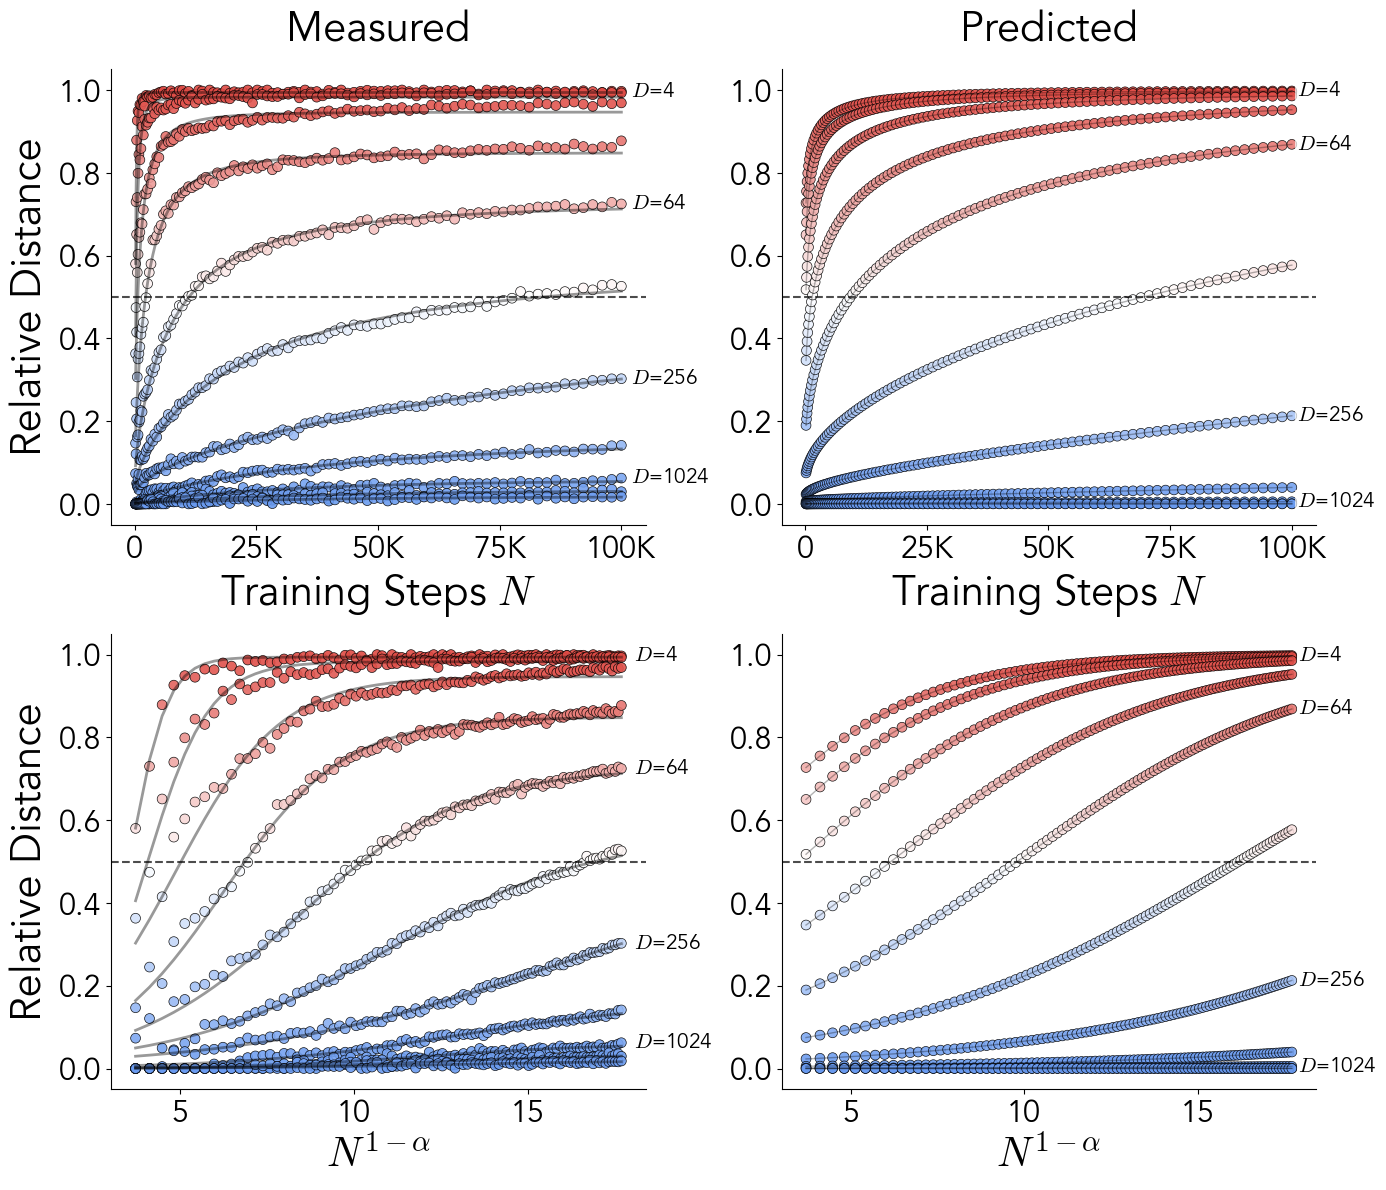

In [10]:
fig_gen_nolongrun.generate_sublinear_evidence_accumulation_plot(
    config={
        "fixed_values": fixed_values,
        "compare_with_predicted": True,
        "tasks_to_label": [4, 64, 256, 1024],
        "custom_name": "annealing_evidence_accumulation_compare_with_predicted",
    },
    show=True,
    save=False,
)

Using alpha = 0.777805288597849, plotting against N^(1-0.777805288597849) = N^0.22219471140215097


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

/sailhome/wurgaft/normative-icl/src/code/analysis_utils.py:1970: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)
/sailhome/wurgaft/normative-icl/src/code/analysis_utils.py:1970: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


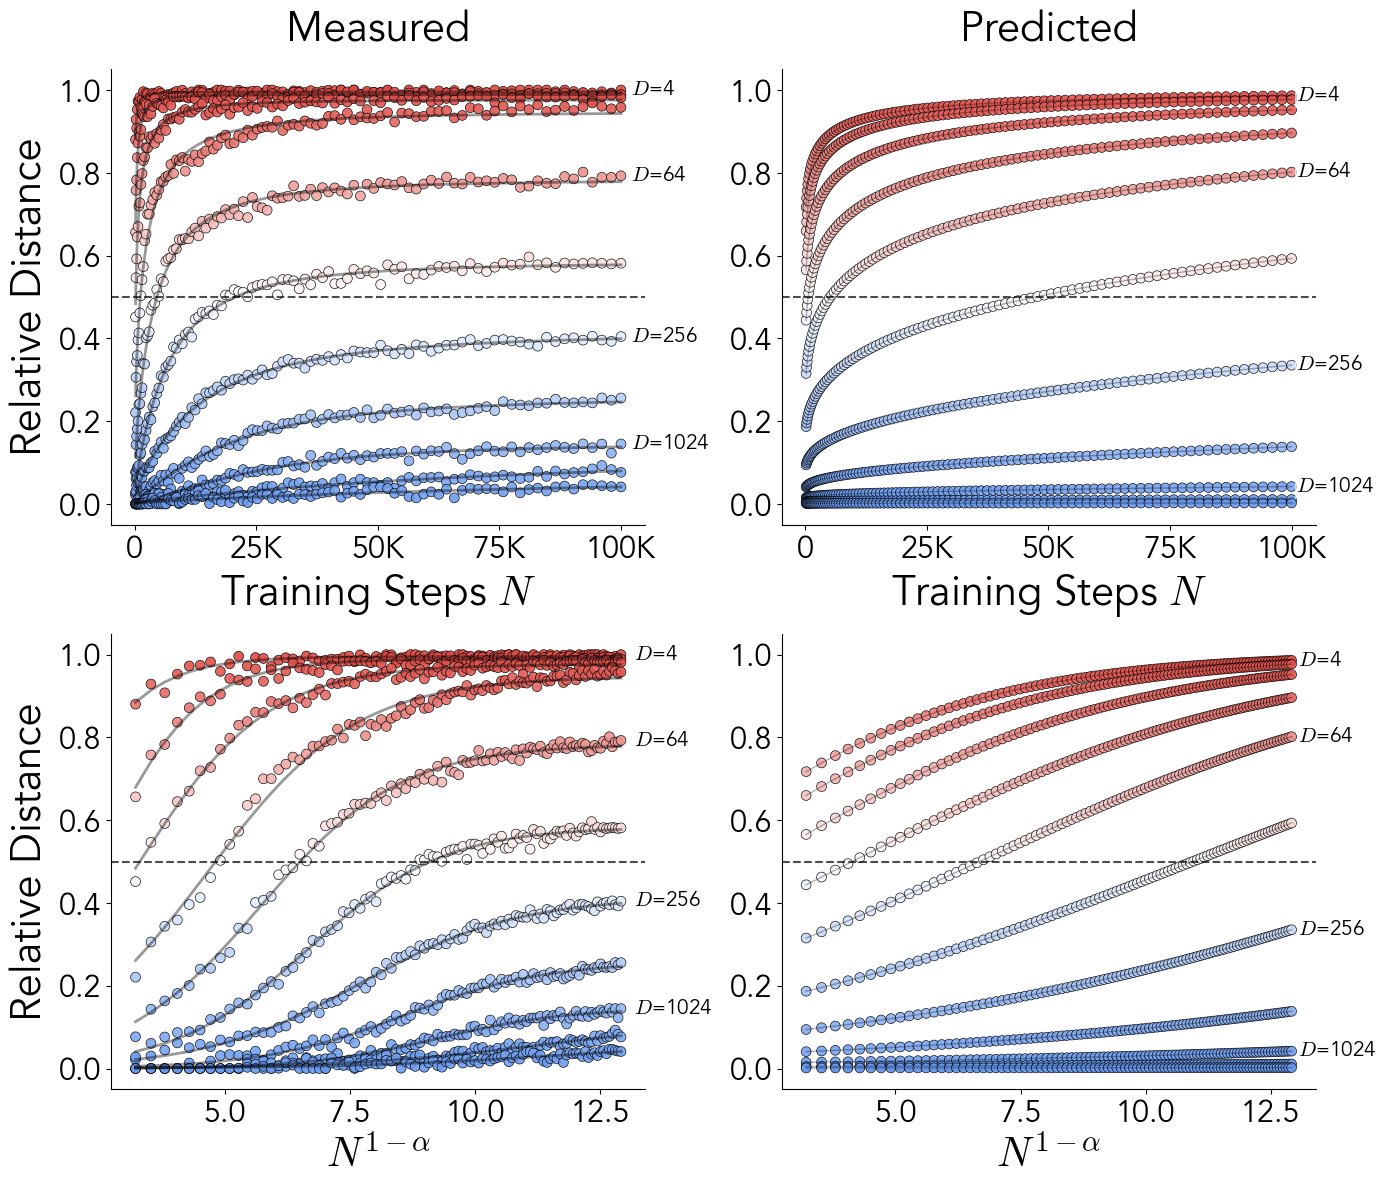

In [11]:
fig_gen_standard.generate_sublinear_evidence_accumulation_plot(
    config={
        "fixed_values": fixed_values,
        "compare_with_predicted": True,
        "tasks_to_label": [4, 64, 256, 1024],
        "custom_name": "standard_evidence_accumulation_compare_with_predicted",
    },
    show=True,
    save=False,
)

Using alpha = 0.7504289701987823, plotting against N^(1-0.7504289701987823) = N^0.2495710298012177


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

/sailhome/wurgaft/normative-icl/src/code/analysis_utils.py:1970: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


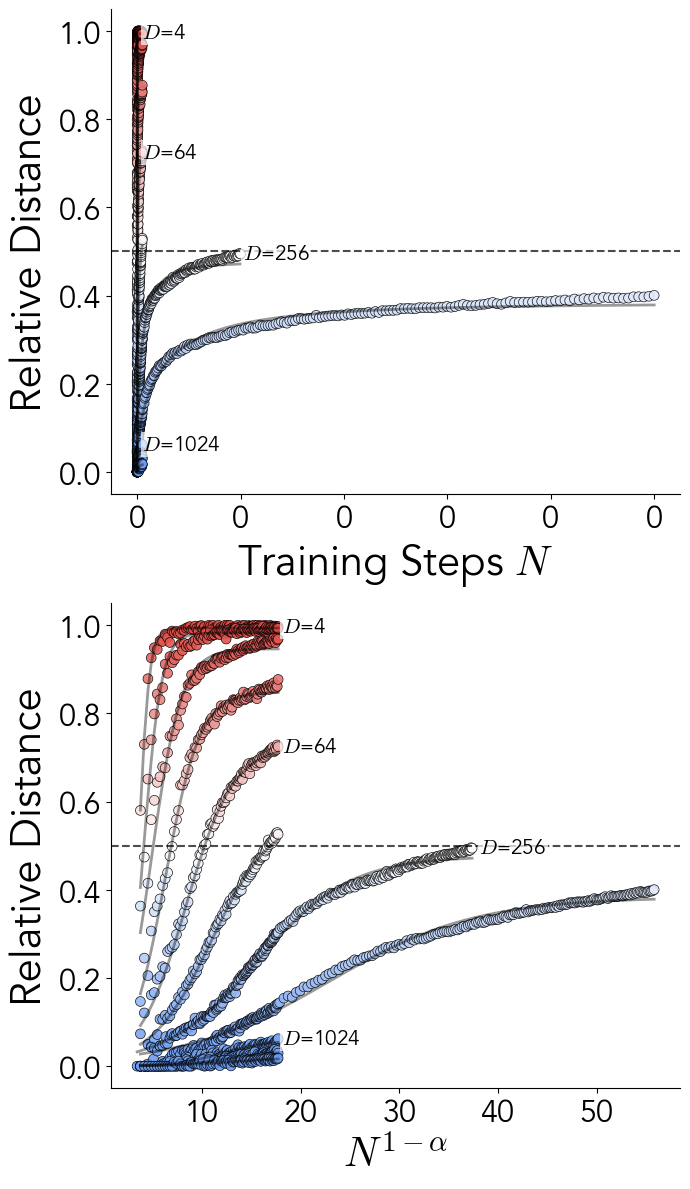

In [12]:
fig_gen_full.generate_sublinear_evidence_accumulation_plot(
    config={
        "fixed_values": fixed_values,
        "compare_with_predicted": False,
        "tasks_to_label": [4, 64, 256, 1024],
        "custom_name": "annealing_long_run_relative_distance_accumulation",
    },
    show=True,
    save=False,
)

#### Predict Transience

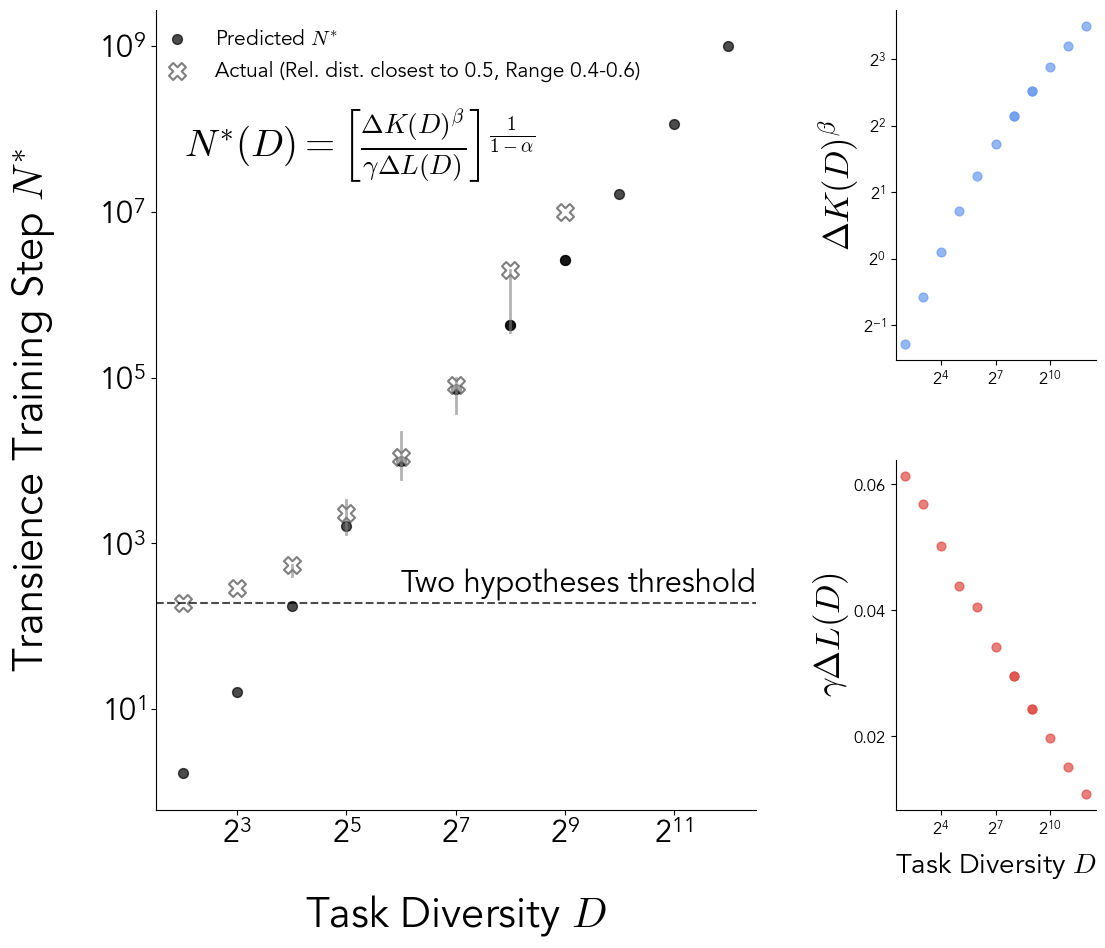

In [13]:
fig_gen_full.generate_transience_predictions_plot(
    config={
        "fixed_values": fixed_values,
        "two_hypotheses_cutoff": transformer_df[
            "approximate_interpolation_threshold"
        ].iloc[0],
        "close_to_half_threshold": 0.1,
    },
    show=True,
    save=False,
)

# Repeating analysis for linear regression

In [3]:
# choose variables to evaluate
CONTEXT_LENGTH_TO_EVAL = [16]
MLP_EXPANSION_FACTOR_TO_EVAL = [4]
NUM_DIMS_TO_EVAL = [8]
NUM_TASKS_TO_EVAL = [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
SETTING = "linear-regression"
ALGO_NAMES_DICT = {
    "memorized": "$M$",
    "generalized": "$G$",
}
fixed_values = {
    "context_length": CONTEXT_LENGTH_TO_EVAL[0],
    "mlp_expansion_factor": MLP_EXPANSION_FACTOR_TO_EVAL[0],
    "num_dims": NUM_DIMS_TO_EVAL[0],
}


EXP_SUCCESS = "inverse-sqrt-full-exp"
analysis_pipeline_success = AnalysisPipeline(
    setting=SETTING,
    exp_name=EXP_SUCCESS,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
)

EXP_FAILED = "inverse-sqrt-failed"
analysis_pipeline_failed = AnalysisPipeline(
    setting=SETTING,
    exp_name=EXP_FAILED,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
)


# load standard experiment for comparison
EXP_STANDARD = "full-exp-params"
analysis_pipeline_standard = AnalysisPipeline(
    setting=SETTING,
    exp_name=EXP_STANDARD,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
)

experiment params:  {'setting': 'linear-regression', 'num_dims_lst': [8], 'num_tasks_lst': [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096], 'context_length_lst': [16], 'mlp_expansion_factor_lst': [4], 'random_seed': 1, 'num_hidden_layers': 8, 'hidden_size': 64, 'batch_size': 128, 'learning_rate': 0.0005, 'max_steps': 100000, 'save_steps': [20, 58, 115, 193, 291, 408, 545, 703, 879, 1076, 1293, 1529, 1785, 2062, 2357, 2673, 3009, 3364, 3739, 4135, 4549, 4984, 5439, 5913, 6407, 6921, 7455, 8009, 8583, 9176, 9789, 10422, 11075, 11748, 12441, 13153, 13885, 14637, 15409, 16201, 17013, 17844, 18695, 19566, 20457, 21368, 22298, 23249, 24219, 25209, 26219, 27249, 28298, 29368, 30457, 31566, 32695, 33844, 35012, 36201, 37409, 38637, 39885, 41153, 42440, 43747, 45075, 46422, 47789, 49175, 50582, 52008, 53455, 54921, 56407, 57912, 59438, 60983, 62548, 64133, 65738, 67363, 69008, 70672, 72356, 74060, 75784, 77528, 79291, 81075, 82878, 84701, 86544, 88407, 90289, 92192, 94114, 96056, 98018, 100

  0%|          | 0/1100 [00:00<?, ?it/s]

experiment params:  {'setting': 'linear-regression', 'num_dims_lst': [8], 'num_tasks_lst': [32, 64, 128, 256, 512], 'context_length_lst': [16], 'mlp_expansion_factor_lst': [4], 'random_seed': 1, 'num_hidden_layers': 8, 'hidden_size': 64, 'batch_size': 128, 'learning_rate': 0.0005, 'max_steps': 100000, 'save_steps': [20, 58, 115, 193, 291, 408, 545, 703, 879, 1076, 1293, 1529, 1785, 2062, 2357, 2673, 3009, 3364, 3739, 4135, 4549, 4984, 5439, 5913, 6407, 6921, 7455, 8009, 8583, 9176, 9789, 10422, 11075, 11748, 12441, 13153, 13885, 14637, 15409, 16201, 17013, 17844, 18695, 19566, 20457, 21368, 22298, 23249, 24219, 25209, 26219, 27249, 28298, 29368, 30457, 31566, 32695, 33844, 35012, 36201, 37409, 38637, 39885, 41153, 42440, 43747, 45075, 46422, 47789, 49175, 50582, 52008, 53455, 54921, 56407, 57912, 59438, 60983, 62548, 64133, 65738, 67363, 69008, 70672, 72356, 74060, 75784, 77528, 79291, 81075, 82878, 84701, 86544, 88407, 90289, 92192, 94114, 96056, 98018, 100000], 'name_suffix': 'invers

  0%|          | 0/500 [00:00<?, ?it/s]

experiment params:  {'setting': 'linear-regression', 'num_dims_lst': [8, 12, 16], 'num_tasks_lst': [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096], 'context_length_lst': [16, 32, 64], 'mlp_expansion_factor_lst': [0.5, 4, 8], 'random_seed': 1, 'num_hidden_layers': 8, 'hidden_size': 64, 'batch_size': 128, 'learning_rate': 0.0005, 'max_steps': 100000, 'save_steps': [20, 58, 115, 193, 291, 408, 545, 703, 879, 1076, 1293, 1529, 1785, 2062, 2357, 2673, 3009, 3364, 3739, 4135, 4549, 4984, 5439, 5913, 6407, 6921, 7455, 8009, 8583, 9176, 9789, 10422, 11075, 11748, 12441, 13153, 13885, 14637, 15409, 16201, 17013, 17844, 18695, 19566, 20457, 21368, 22298, 23249, 24219, 25209, 26219, 27249, 28298, 29368, 30457, 31566, 32695, 33844, 35012, 36201, 37409, 38637, 39885, 41153, 42440, 43747, 45075, 46422, 47789, 49175, 50582, 52008, 53455, 54921, 56407, 57912, 59438, 60983, 62548, 64133, 65738, 67363, 69008, 70672, 72356, 74060, 75784, 77528, 79291, 81075, 82878, 84701, 86544, 88407, 90289, 92192, 

  0%|          | 0/29700 [00:00<?, ?it/s]

## Process data

In [4]:
algo_df_success = analysis_pipeline_success.process_algo_df(
    analysis_pipeline_success.algo_df_raw,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    num_tasks_to_eval=NUM_TASKS_TO_EVAL,
    load_saved_evaluation=True,
)

algo_df_failed = analysis_pipeline_failed.process_algo_df(
    analysis_pipeline_failed.algo_df_raw,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    num_tasks_to_eval=NUM_TASKS_TO_EVAL,
    load_saved_evaluation=True,
)

algo_df_standard = analysis_pipeline_standard.process_algo_df(
    analysis_pipeline_standard.algo_df_raw,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    num_tasks_to_eval=NUM_TASKS_TO_EVAL,
    load_saved_evaluation=True,
)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

In [5]:
transformer_df_success_all_checkpoints = (
    analysis_pipeline_success.process_transformer_df(
        analysis_pipeline_success.transformer_df_raw,
        algo_df=algo_df_success,
        num_dims_to_eval=NUM_DIMS_TO_EVAL,
        context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
        num_tasks_to_eval=NUM_TASKS_TO_EVAL,
        mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
        load_saved_evaluation=True,
        compute_distance_from_algos=True,
    )
)


transformer_df_success = find_approximate_interpolation_threshold(
    transformer_df_success_all_checkpoints,
    threshold_percentile=0.1 if SETTING == "linear-regression" else 0.2,
).query("included_in_interpolation_analysis == 1")

# create failed df
transformer_df_failed_all_checkpoints = analysis_pipeline_failed.process_transformer_df(
    analysis_pipeline_failed.transformer_df_raw,
    algo_df=algo_df_failed,
    num_dims_to_eval=NUM_DIMS_TO_EVAL,
    context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
    num_tasks_to_eval=NUM_TASKS_TO_EVAL,
    mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
    load_saved_evaluation=True,
    compute_distance_from_algos=True,
)

transformer_df_failed = find_approximate_interpolation_threshold(
    transformer_df_failed_all_checkpoints,
    threshold_percentile=0.1 if SETTING == "linear-regression" else 0.2,
).query("included_in_interpolation_analysis == 1")


# create standard df
transformer_df_standard_all_checkpoints = (
    analysis_pipeline_standard.process_transformer_df(
        analysis_pipeline_standard.transformer_df_raw,
        algo_df=algo_df_standard,
        num_dims_to_eval=NUM_DIMS_TO_EVAL,
        context_length_to_eval=CONTEXT_LENGTH_TO_EVAL,
        num_tasks_to_eval=NUM_TASKS_TO_EVAL,
        mlp_expansion_factor_to_eval=MLP_EXPANSION_FACTOR_TO_EVAL,
        load_saved_evaluation=True,
        compute_distance_from_algos=True,
    )
)

transformer_df_standard = find_approximate_interpolation_threshold(
    transformer_df_standard_all_checkpoints,
    threshold_percentile=0.1 if SETTING == "linear-regression" else 0.2,
).query("included_in_interpolation_analysis == 1")

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

  0%|          | 0/1100 [00:00<?, ?it/s]

In [17]:
# fit success model free params

# Fit Bayesian model free params
model_fitter = HierarchicalBayesianModelFitter(
    transformer_df=transformer_df_success,
    algo_df=algo_df_success,
    mlp_expansion_factor=MLP_EXPANSION_FACTOR_TO_EVAL[0],
    context_length=CONTEXT_LENGTH_TO_EVAL[0],
    num_dims=NUM_DIMS_TO_EVAL[0],
    params_init=analysis_pipeline_success.params_init,
    metric_name=analysis_pipeline_success.metric_name,
    load_saved_evaluation=True,
    remove_last_prediction=analysis_pipeline_success.remove_last_prediction,
    add_to_df=True,
    baseline_lst=["optimal_constant_baseline"],
)
transformer_df_success, history, model = model_fitter.fit()

batch_size:  128
train_checkpoints: [ 7455  8009  8583  9176  9789 10422 11075 11748 12441 13153 13885 14637
 15409 16201 17013 17844 18695 19566 20457 21368 22298 23249 24219 25209
 26219 27249 28298 29368 30457 31566 32695 33844 35012 36201 37409 38637
 39885 41153 42440 43747 45075 46422 47789 49175 50582 52008 53455 54921
 56407 57912 59438 60983 62548 64133 65738 67363 69008 70672 72356 74060] 
train_num_tasks: [   4    8   16   32   64  128  256  512 1024]


Loading saved BMS results for all rows:   0%|          | 0/814 [00:00<?, ?it/s]

In [20]:
# fit standard bayesian model free params

# Fit Bayesian model free params
model_fitter = HierarchicalBayesianModelFitter(
    transformer_df=transformer_df_standard,
    algo_df=algo_df_standard,
    mlp_expansion_factor=MLP_EXPANSION_FACTOR_TO_EVAL[0],
    context_length=CONTEXT_LENGTH_TO_EVAL[0],
    num_dims=NUM_DIMS_TO_EVAL[0],
    params_init=analysis_pipeline_standard.params_init,
    metric_name=analysis_pipeline_standard.metric_name,
    load_saved_evaluation=True,
    remove_last_prediction=analysis_pipeline_standard.remove_last_prediction,
    add_to_df=True,
    baseline_lst=["optimal_constant_baseline"],
)
transformer_df_standard, history, model = model_fitter.fit()

batch_size:  128
train_checkpoints: [ 7455  8009  8583  9176  9789 10422 11075 11748 12441 13153 13885 14637
 15409 16201 17013 17844 18695 19566 20457 21368 22298 23249 24219 25209
 26219 27249 28298 29368 30457 31566 32695 33844 35012 36201 37409 38637
 39885 41153 42440 43747 45075 46422 47789 49175 50582 52008 53455 54921
 56407 57912 59438 60983 62548 64133 65738 67363 69008 70672 72356 74060] 
train_num_tasks: [   4    8   16   32   64  128  256  512 1024]


Loading saved BMS results for all rows:   0%|          | 0/814 [00:00<?, ?it/s]

In [7]:
# fit failed bayesian model free params

# Fit Bayesian model free params
model_fitter = HierarchicalBayesianModelFitter(
    transformer_df=transformer_df_failed,
    algo_df=algo_df_failed,
    mlp_expansion_factor=MLP_EXPANSION_FACTOR_TO_EVAL[0],
    context_length=CONTEXT_LENGTH_TO_EVAL[0],
    num_dims=NUM_DIMS_TO_EVAL[0],
    params_init={
        "log_alpha": torch.log(torch.tensor(0.85)),
        "log_beta": torch.log(torch.tensor(0.15)),
        "log_gamma": torch.log(torch.tensor(0.001)),
    },
    metric_name=analysis_pipeline_failed.metric_name,
    load_saved_evaluation=False,
    remove_last_prediction=analysis_pipeline_failed.remove_last_prediction,
    add_to_df=True,
    baseline_lst=[""],
)
transformer_df_failed, history, model = model_fitter.fit()

batch_size:  128
train_checkpoints: [ 4984  5439  5913  6407  6921  7455  8009  8583  9176  9789 10422 11075
 11748 12441 13153 13885 14637 15409 16201 17013 17844 18695 19566 20457
 21368 22298 23249 24219 25209 26219 27249 28298 29368 30457 31566 32695
 33844 35012 36201 37409 38637 39885 41153 42440 43747 45075 46422 47789
 49175 50582 52008 53455 54921 56407 57912 59438 60983 62548 64133 65738
 67363 69008 70672 72356] 
train_num_tasks: [ 32  64 128 256]
Processing 395 rows...
Training HierarchicalBayesianModel model with 256 batches...
Starting optimization with 3 parameters
Initial parameter values: [-0.1625189  -1.89712    -6.90775537]
Optimizing with L-BFGS-B...


 This problem is unconstrained.                                        


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67638D-01    |proj g|=  1.49890D-01



At iterate    1    f=  3.46060D-01    |proj g|=  8.03676D-02



At iterate    2    f=  3.41924D-01    |proj g|=  1.05571D-02



At iterate    3    f=  3.27626D-01    |proj g|=  6.24942D-02



At iterate    4    f=  3.27610D-01    |proj g|=  6.50535D-02



At iterate    5    f=  3.25827D-01    |proj g|=  2.40625D-03



At iterate    6    f=  3.25826D-01    |proj g|=  1.34159D-03



At iterate    7    f=  3.25826D-01    |proj g|=  1.34159D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7     41      1     0     0   1.342D-03   3.258D-01
  F =  0.32582572102546692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Optimization complete with final loss: 0.325826
Final parameter values: [-0.53746216 -1.37014658 -6.87404593] (when exponentiated: [0.58422905 0.25406972 0.00103428])



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


  0%|          | 0/395 [00:00<?, ?it/s]

In [23]:
# make fig_gen instances
fig_gen_success = FigureGenerator(
    transformer_df_success,
    transformer_df_success_all_checkpoints,
    algo_df_success,
    EXP_NAME,
)

fig_gen_standard = FigureGenerator(
    transformer_df_standard,
    transformer_df_standard_all_checkpoints,
    algo_df_standard,
    EXP_NAME,
)

fig_gen_failed = FigureGenerator(
    transformer_df_failed,
    transformer_df_failed_all_checkpoints,
    algo_df_failed,
    EXP_NAME,
)

Registered Avenir font from: /sailhome/wurgaft/.fonts/Avenir.ttc
Registered Avenir font from: /sailhome/wurgaft/.fonts/Avenir.ttc
Registered Avenir font from: /sailhome/wurgaft/.fonts/Avenir.ttc


Using alpha = 0.8591185933818384, plotting against N^(1-0.8591185933818384) = N^0.14088140661816162


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

/sailhome/wurgaft/normative-icl/src/code/analysis_utils.py:1970: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)
/sailhome/wurgaft/normative-icl/src/code/analysis_utils.py:1970: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


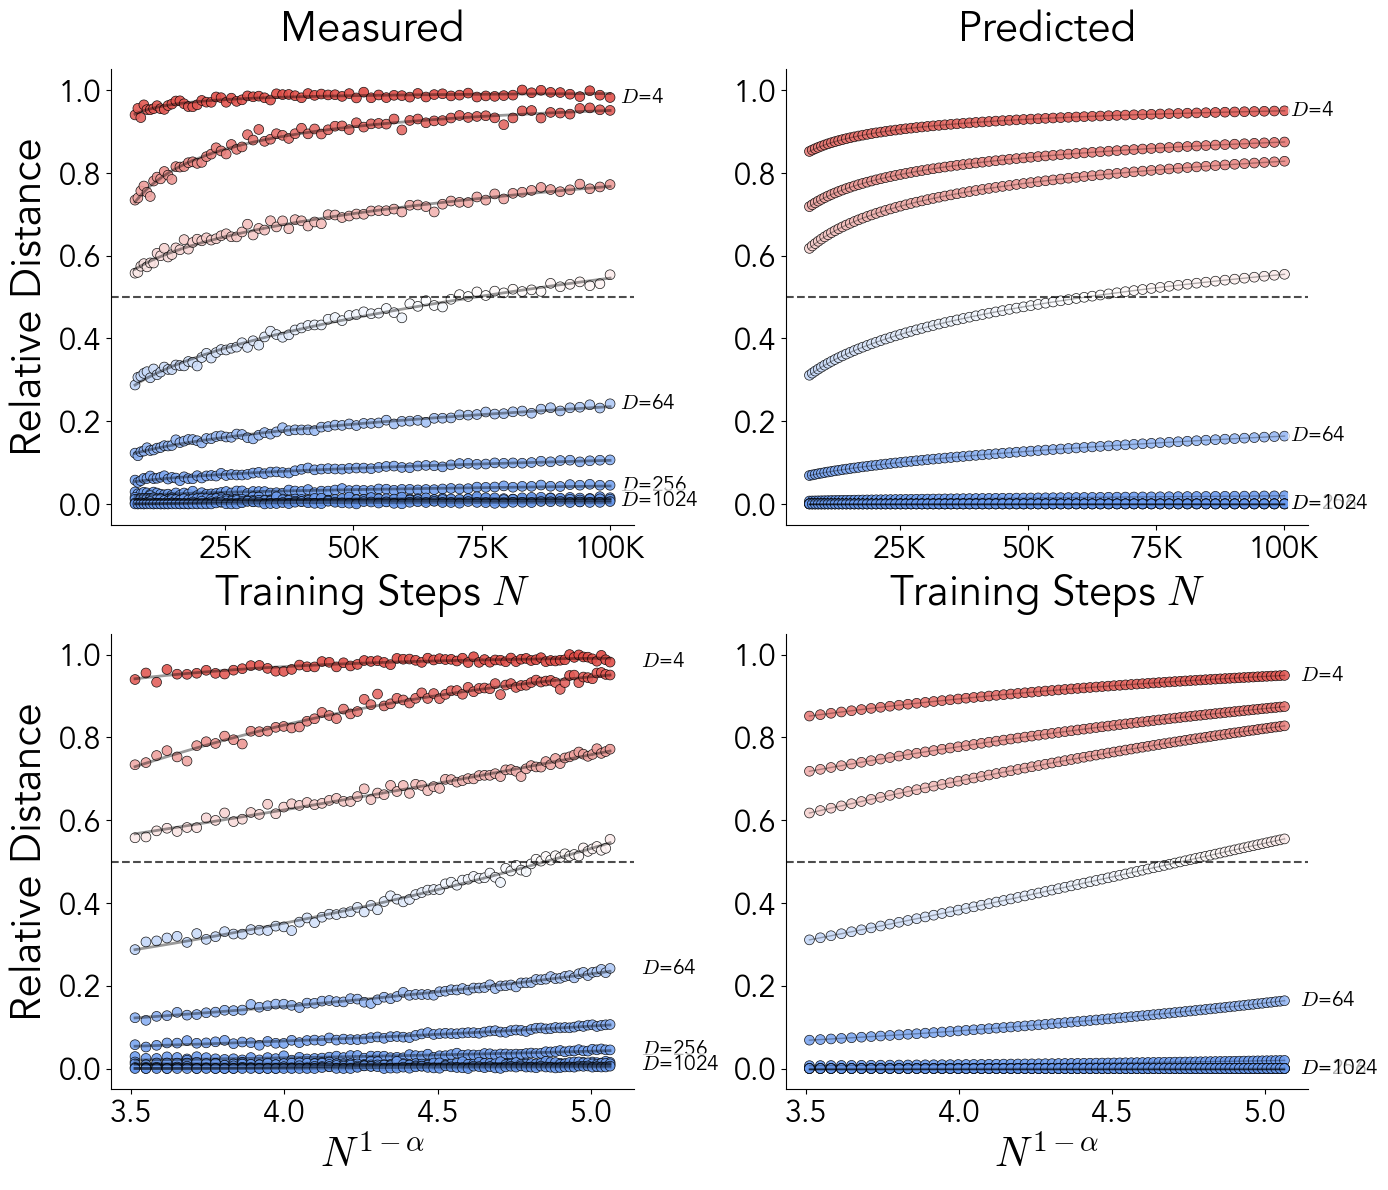

In [24]:
fig_gen_success.generate_sublinear_evidence_accumulation_plot(
    config={
        "fixed_values": fixed_values,
        "compare_with_predicted": True,
        "tasks_to_label": [4, 64, 256, 1024],
        "custom_name": "annealing_evidence_accumulation_compare_with_predicted",
    },
    show=True,
    save=False,
)

Using alpha = 0.7456585643101719, plotting against N^(1-0.7456585643101719) = N^0.25434143568982814


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

/sailhome/wurgaft/normative-icl/src/code/analysis_utils.py:1970: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)
/sailhome/wurgaft/normative-icl/src/code/analysis_utils.py:1970: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


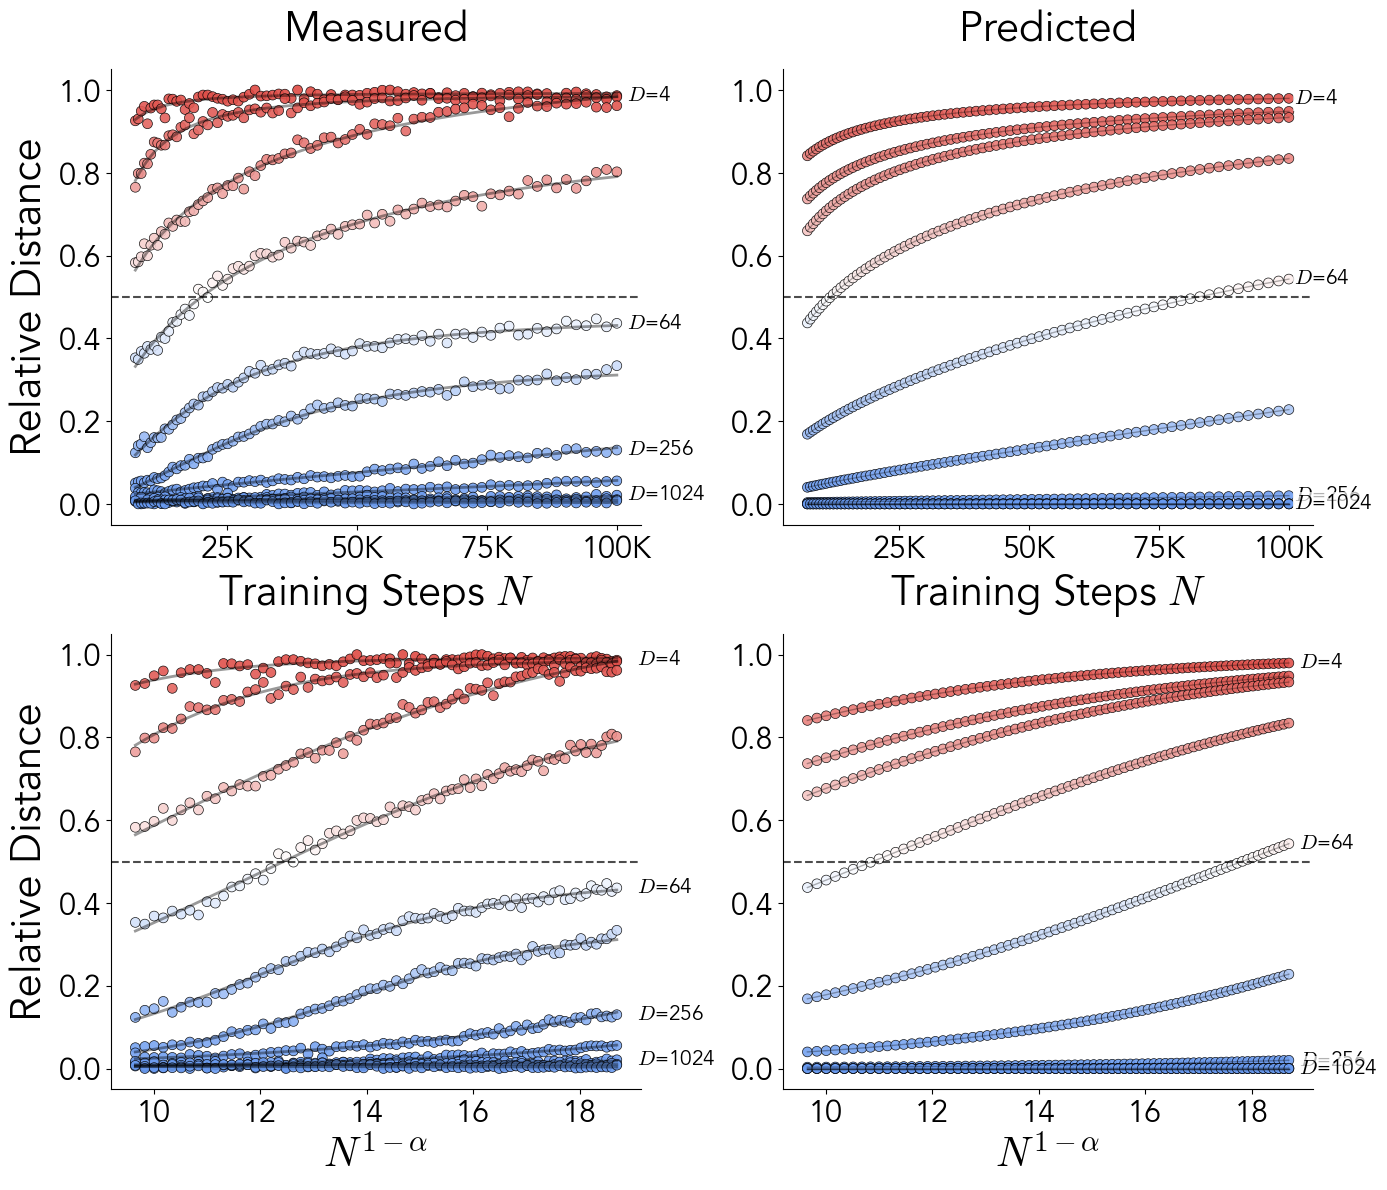

In [25]:
fig_gen_standard.generate_sublinear_evidence_accumulation_plot(
    config={
        "fixed_values": fixed_values,
        "compare_with_predicted": True,
        "tasks_to_label": [4, 64, 256, 1024],
        "custom_name": "standard_evidence_accumulation_compare_with_predicted",
    },
    show=True,
    save=False,
)

Using alpha = 0.5842290539000804, plotting against N^(1-0.5842290539000804) = N^0.4157709460999196


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

/sailhome/wurgaft/normative-icl/src/code/analysis_utils.py:1970: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)
/sailhome/wurgaft/normative-icl/src/code/analysis_utils.py:1970: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


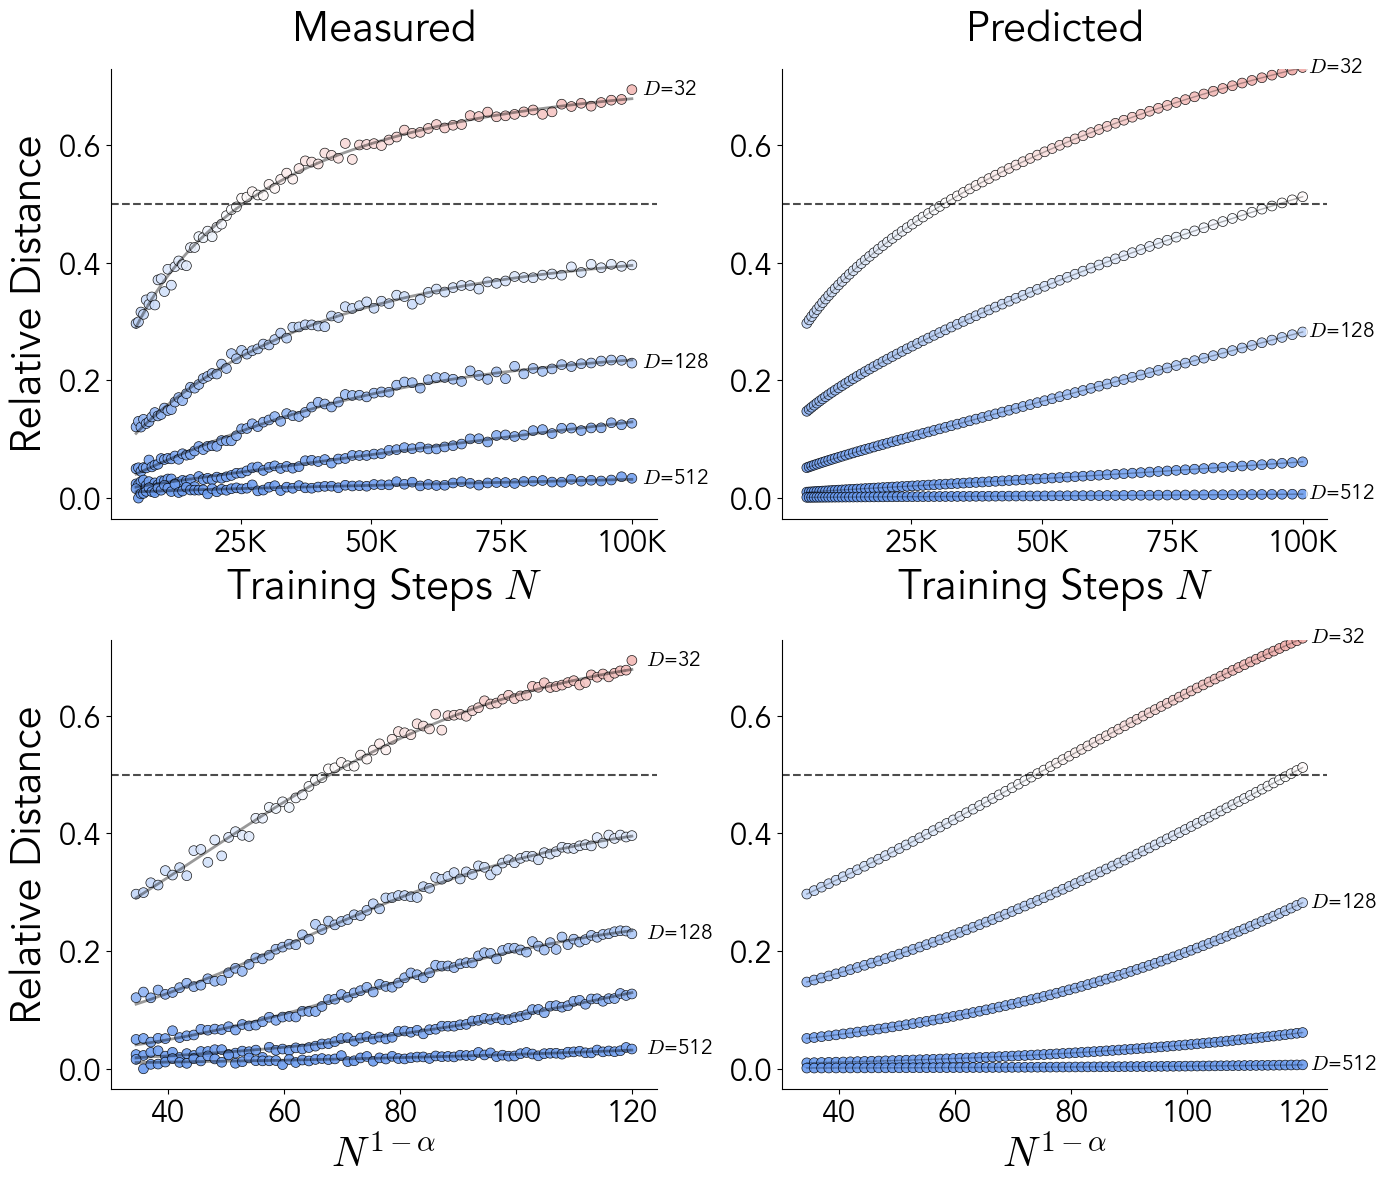

In [26]:
fig_gen_failed.generate_sublinear_evidence_accumulation_plot(
    config={
        "fixed_values": fixed_values,
        "compare_with_predicted": True,
        "tasks_to_label": [32, 128, 512],
        "custom_name": "annealing_failed",
    },
    show=True,
    save=False,
)